<a href="https://colab.research.google.com/github/anjani-ai/AI-Chat-Based-To-Do-Manager/blob/main/AINOSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy

In [2]:
# Install required libraries
!pip install numpy pandas scikit-learn matplotlib

In [3]:
import numpy as np
import pandas as pd

# Simulating sensor data
np.random.seed(42)
sensor_data = np.random.random((100, 5))  # 100 samples, 5 sensors
labels = np.random.choice(['Odor A', 'Odor B', 'Odor C'], size=100)  # Random odors

# Create a DataFrame
data = pd.DataFrame(sensor_data, columns=[f'Sensor_{i+1}' for i in range(5)])
data['Label'] = labels

# Display the first few rows
print("Simulated Sensor Data:")
print(data.head())

# Save to CSV (optional, to mimic real data loading)
data.to_csv('sensor_data.csv', index=False)


Simulated Sensor Data:
   Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5   Label
0  0.374540  0.950714  0.731994  0.598658  0.156019  Odor B
1  0.155995  0.058084  0.866176  0.601115  0.708073  Odor C
2  0.020584  0.969910  0.832443  0.212339  0.181825  Odor A
3  0.183405  0.304242  0.524756  0.431945  0.291229  Odor A
4  0.611853  0.139494  0.292145  0.366362  0.456070  Odor A


In [4]:
# Upload the CSV file from your system
from google.colab import files
uploaded = files.upload()

# Load the CSV file
import pandas as pd
data = pd.read_csv('sensor_data.csv')
print("Loaded Sensor Data:")
print(data.head())


Saving codeql-analysis.yml to codeql-analysis.yml
Loaded Sensor Data:
   Sensor_1  Sensor_2  Sensor_3  Sensor_4  Sensor_5   Label
0  0.374540  0.950714  0.731994  0.598658  0.156019  Odor B
1  0.155995  0.058084  0.866176  0.601115  0.708073  Odor C
2  0.020584  0.969910  0.832443  0.212339  0.181825  Odor A
3  0.183405  0.304242  0.524756  0.431945  0.291229  Odor A
4  0.611853  0.139494  0.292145  0.366362  0.456070  Odor A


In [5]:
from sklearn.preprocessing import StandardScaler

# Separate features and labels
X = data.iloc[:, :-1]  # All columns except the last one
y = data['Label']      # The last column

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Data Preprocessed!")


Data Preprocessed!


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Odor A       0.38      0.75      0.50         8
      Odor B       0.33      0.17      0.22         6
      Odor C       0.00      0.00      0.00         6

    accuracy                           0.35        20
   macro avg       0.24      0.31      0.24        20
weighted avg       0.25      0.35      0.27        20



In [7]:
# Simulate new sensor data as a DataFrame (with feature names)
new_reading_df = pd.DataFrame(np.random.random((1, 5)), columns=[f'Sensor_{i+1}' for i in range(5)])

# Scale the new reading (using the same scaler fitted on the training data)
new_reading_scaled = scaler.transform(new_reading_df)

# Predict the odor
predicted_odor = model.predict(new_reading_scaled)
print("Predicted Odor:", predicted_odor[0])


Predicted Odor: Odor A


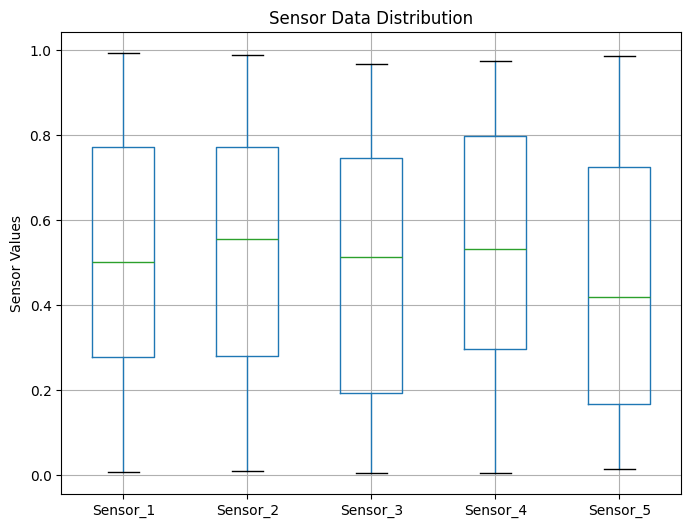

In [8]:
import matplotlib.pyplot as plt

# Extract sensor columns explicitly
sensor_columns = data.columns[:-1]  # All columns except the last one (Label)

# Plot the boxplot for sensor data
plt.figure(figsize=(8, 6))
data.boxplot(column=list(sensor_columns))  # Ensure it's a list
plt.title("Sensor Data Distribution")
plt.ylabel("Sensor Values")
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])


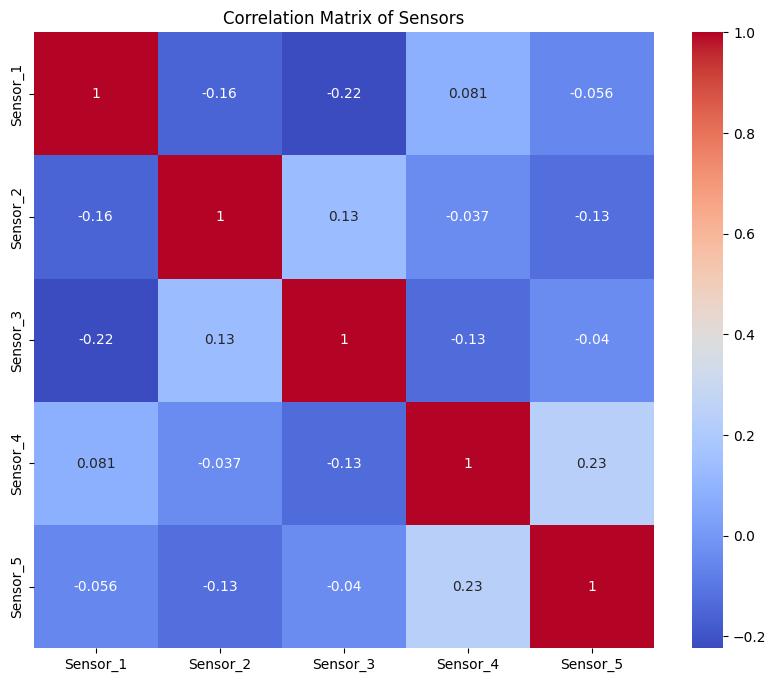

In [10]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data[sensor_columns].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Sensors")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split

X = data[sensor_columns]  # Features
y = data["Label"]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


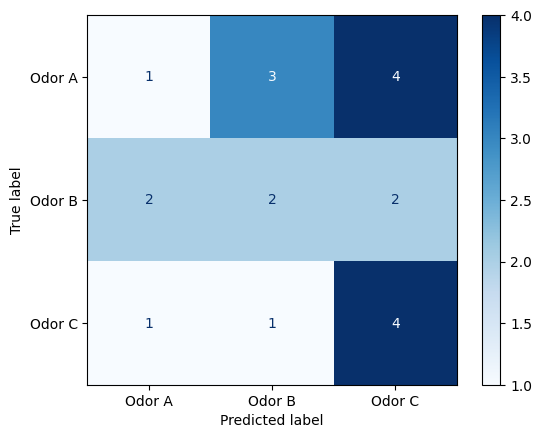

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()


In [13]:
for col in sensor_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])


In [15]:
from sklearn.model_selection import train_test_split

X = data[sensor_columns]  # Features (sensor readings)
y = data["Label"]         # Target (smell labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.35


In [18]:
print(y.value_counts())


Label
Odor A    42
Odor B    30
Odor C    28
Name: count, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
